In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from IPython.display import clear_output

In [2]:
from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor

In [3]:
ts = GaitTimeSeries().load_data('../tests/data/cloudupdrs_gait.csv')

Sampling rate is 46.916666666666664 Hz


In [14]:
gp = GaitProcessor()
resampled = gp.resample_signal(ts)
filtered = gp.filter_data_frame(resampled)

Sampling rate is 96.95833333333333 Hz


In [15]:
data = filtered.mag_sum_acc

In [16]:
import matplotlib.pylab as plt
import numpy as np
from matplotlib.widgets import Button, CheckButtons

labels = {'walk': [10, 39], 'turn': [], 'stand': []}

def plotit(data, labels, what, figsize=(10, 5)):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)

    y = np.array(data)
    x = np.arange(data.shape[0])
    
    colors = 'bgrcmykw'
    
    def add_lines(labels):
        plt.clf()
        
        plt.plot(x,y)
        
        for i, (k, v) in enumerate(labels.items()):
            for start, end in zip(v[0::2], v[1::2]):
                plt.axvspan(start, end, color=colors[i], alpha=0.5)
                
            if len(v) % 2 != 0:
                plt.axvline(x=v[-1], color=colors[i], linestyle='-')
        
        legend =[mpatches.Patch(color=colors[i], label="{} << ".format(k)) for i, k in enumerate(labels.keys()) if k==what]
        legend += [mpatches.Patch(color=colors[i], label="{}".format(k)) for i, k in enumerate(labels.keys()) if k!=what]
        
        plt.legend(handles=legend)
        
    add_lines(labels)
    
    def onclick(event):
        
        remove = False
        
        for k in labels.keys():
            for i, (start, end) in enumerate(zip(labels[k][0::2], labels[k][1::2])):
                print(start, event.xdata, end)
                if start <= event.xdata <= end:
                    del labels[k][i*2:(i+1)*2]
                    remove = True
        
        if not remove:
            labels[what].append(event.xdata)
        
        labels[what] = sorted(labels[what])
        add_lines(labels)
    
    fig.canvas.mpl_connect('button_press_event', onclick)
    fig.show()

<IPython.core.display.Javascript object>


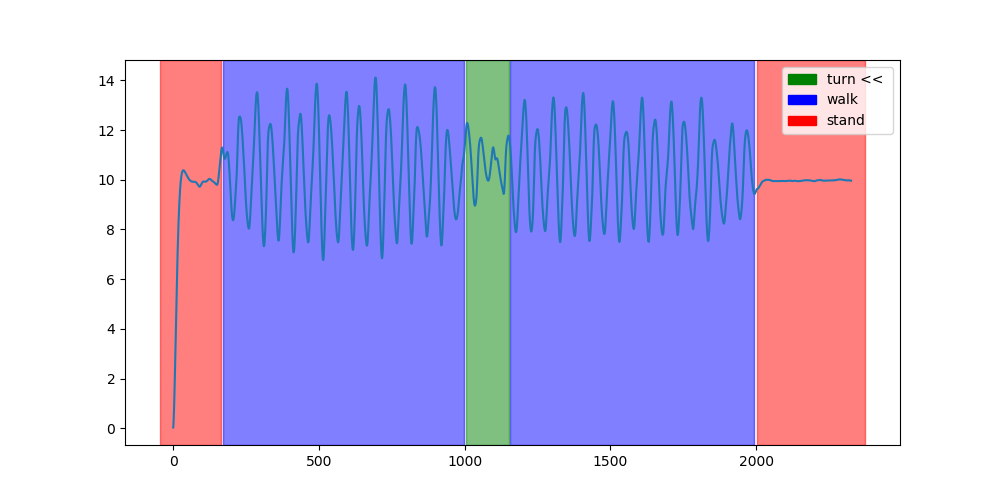

In [19]:
plotit(data.values, labels, 'turn')

In [20]:
labels

{'walk': [170.04142337941244,
  996.9898049764142,
  1154.8305749077922,
  1992.0729197611884],
 'turn': [1003.8524471473438, 1151.3992538223274],
 'stand': [-44.494129032258,
  163.49529032258067,
  2002.924590478668,
  2373.027544817898]}

In [27]:
import matplotlib.pyplot as plt
import numpy as np

labels = {'walk': [(10, 30), (100, 110)], 'turn': [(33, 35)], 'stand': []}

def plotit_noninter(data, labels, figsize=(10, 5)):
    fig, ax = plt.subplots()
    fig.set_size_inches(figsize[0], figsize[1])

    y = np.array(data)
    x = np.arange(data.shape[0])
    
    colors = 'bgrcmykw'
    
        
    data.plot()
        
    for i, (k, v) in enumerate(labels.items()):
        for start, end in v:
            if type(start) != np.datetime64:
                start = data.index.values[start]
                end = data.index.values[end]
                
            plt.axvspan(start, end, color=colors[i], alpha=0.5)
        
    legend = [mpatches.Patch(color=colors[i], label="{}".format(k)) for i, k in enumerate(labels.keys())]

    plt.legend(handles=legend)
    
    plt.show()

<IPython.core.display.Javascript object>


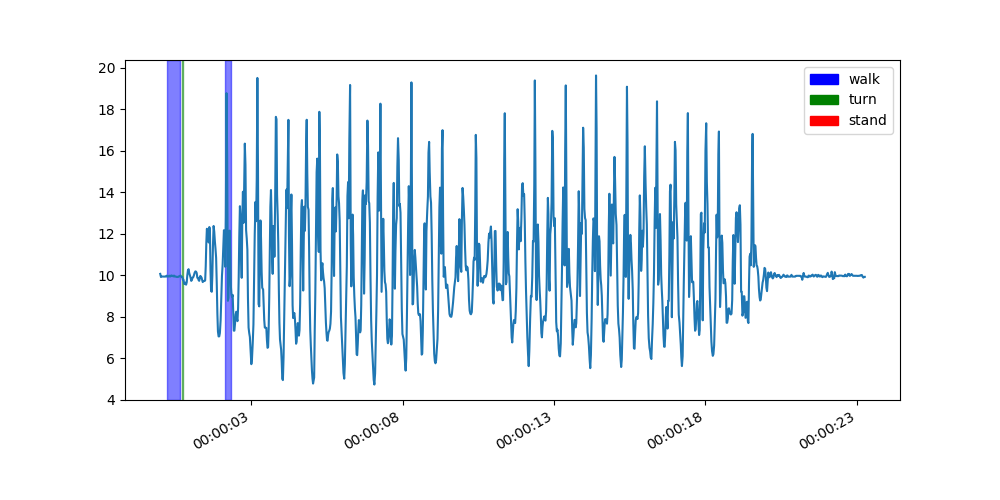

In [28]:
plotit_noninter(data, labels)

In [26]:
type(data.index.values[0])#.index

numpy.datetime64

In [7]:
def manual_label_signal(data, signal_types):
    for k in signal_types.keys():
        clear_output(wait=True)
        plotit(data, signal_types, k, figsize=(10, 5))
#         plt.show(False)
#         plt.draw()

<IPython.core.display.Javascript object>


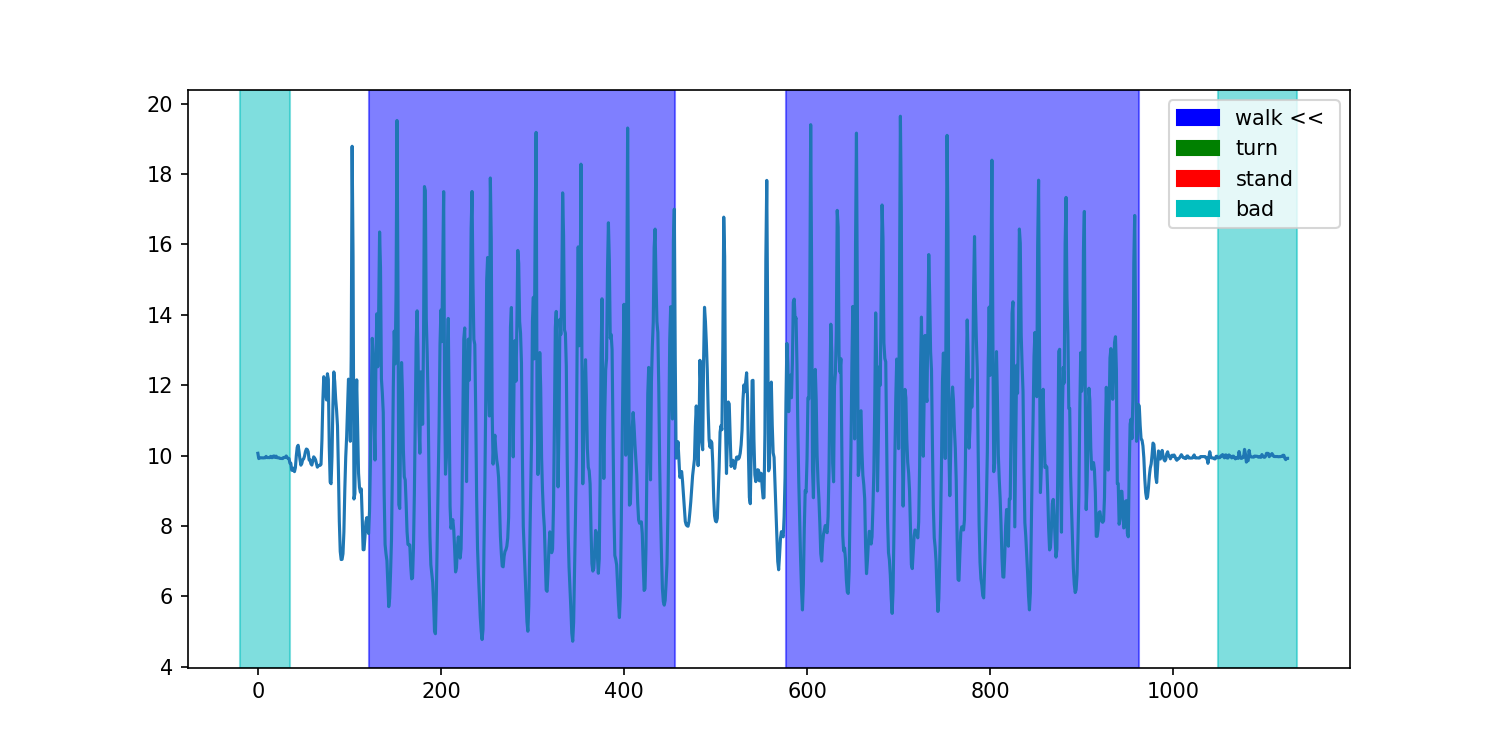

<IPython.core.display.Javascript object>


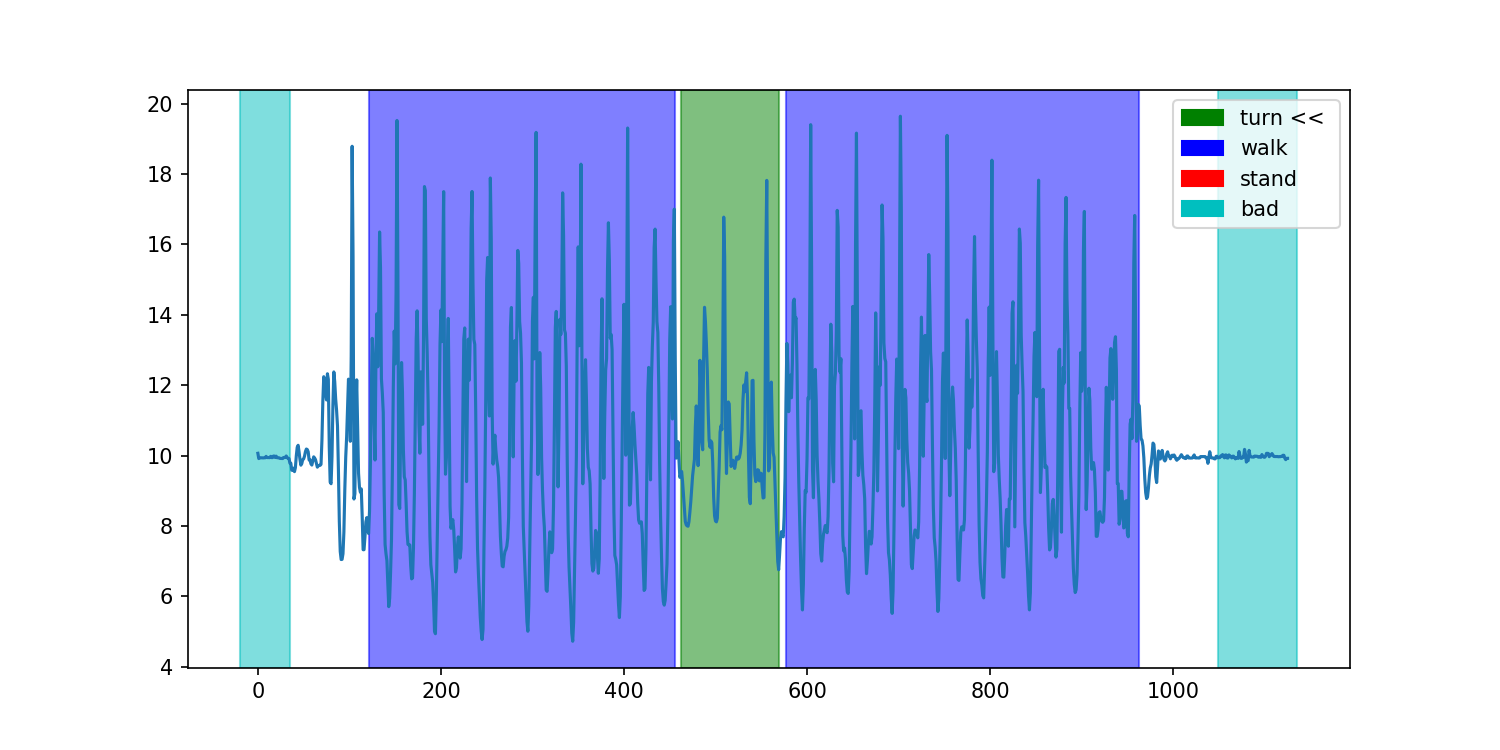

<IPython.core.display.Javascript object>


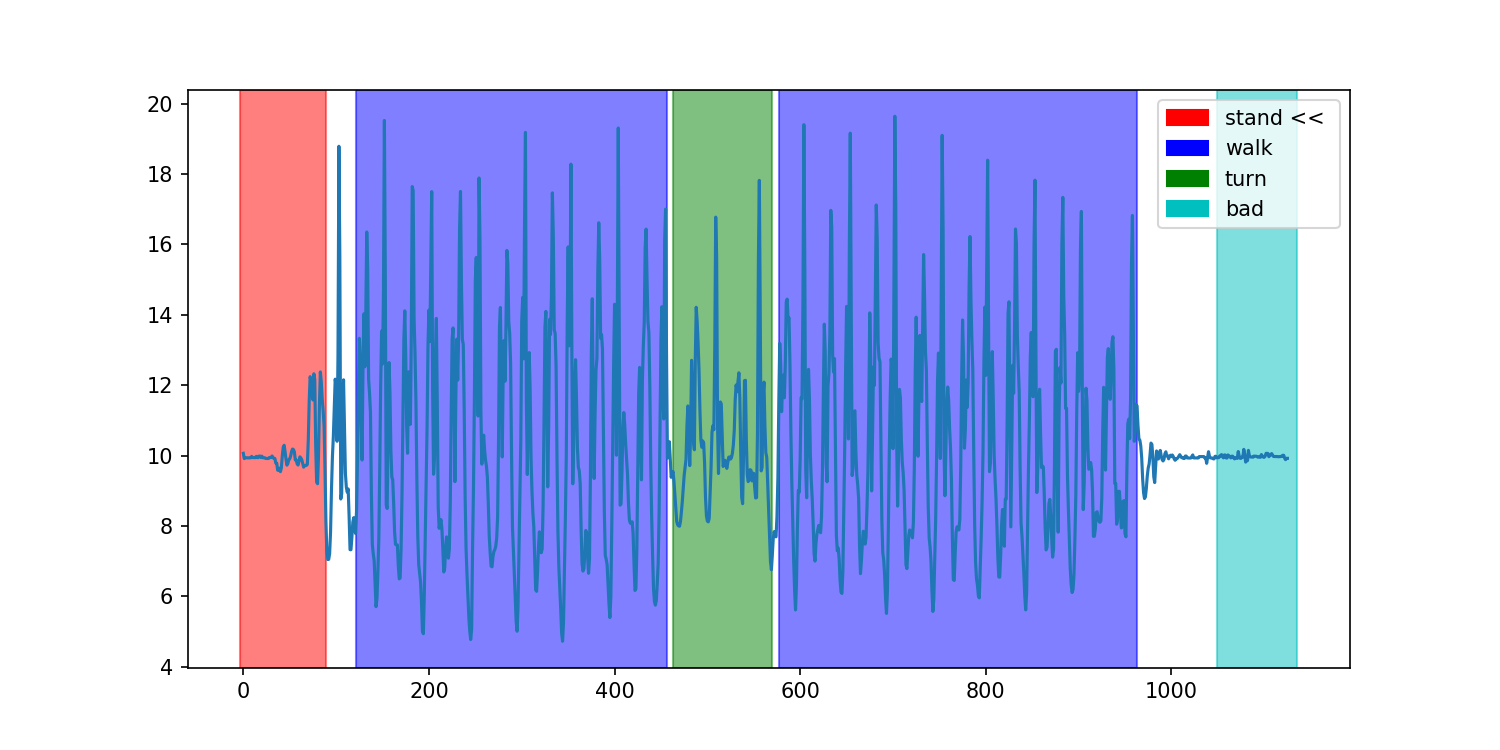

<IPython.core.display.Javascript object>


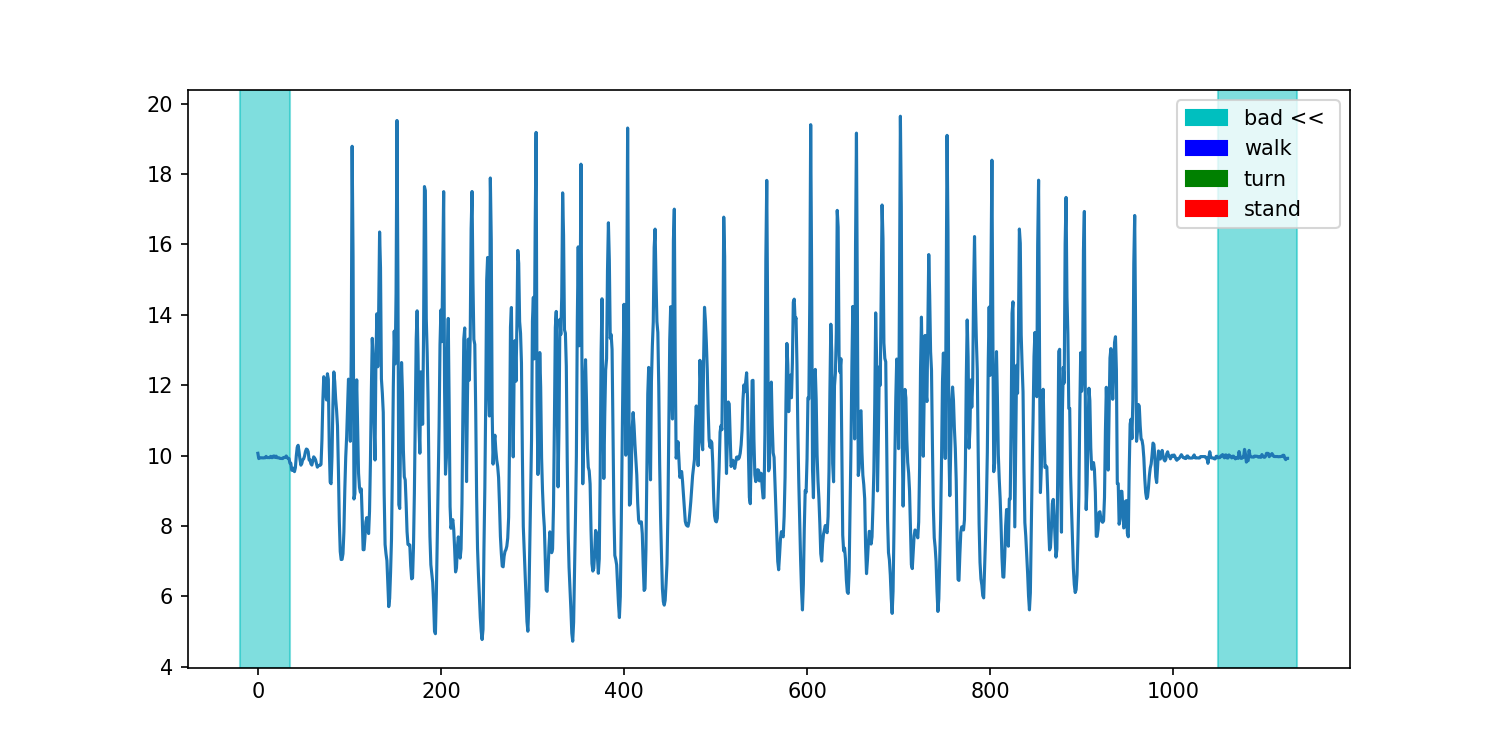

In [40]:
for k in signal_types.keys():
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    
    plotit(fig, data, signal_types, k)
#     clear_output(wait=True)

#     print('Write DONE when done!')
#     while True:
#         answer = input("Are you done??: ")
#         if answer.lower() == 'done':
#             break
#     continue

In [31]:
signal_types

{'walk': [93.44758064516125, 454.3185483870967],
 'turn': [457.51209677419354, 543.7379032258063],
 'stand': [-10.342741935483872,
  64.70564516129033,
  971.8752256763786,
  1116.5815517103529],
 'bad': [67.84941142039537,
  88.79831620707591,
  1123.3519218262227,
  1149.1351892559833]}

In [175]:
legend =[mpatches.Patch(color='red', label='{}'.format(k)) for i, k in enumerate(labels.keys()) if k=='']

In [178]:
ll = legend[0]

In [180]:
ll.

'Artist'

<IPython.core.display.Javascript object>


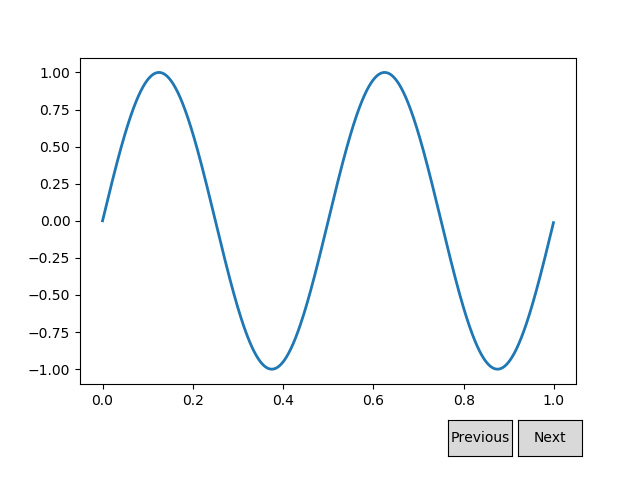

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)

what = 'test'

class Index(object):
    ind = 0

    def next(self, event):
        return 'next'

    def prev(self, event):
        return 'prev'

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
what = bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
what = bprev.on_clicked(callback.prev)

plt.show()

In [42]:
what

0

In [19]:
11%2

1